In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [14]:
spotify <- read_csv("group_project_dsci/data/spotify_top_songs.csv") |>
    select(-track_title, -artist_name, -mode, -time_signature, -key)
head(spotify)

Rows: 34740 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): track_title, artist_name, track_id
dbl (14): duration_ms, energy, key, mode, time_signature, acousticness, danc...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


track_id,duration_ms,energy,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3FeufAV1f6fajILIQuAXMw,256080,0.96800,0.02150,0.698,8.62e-01,0.1110,-11.012,0.0337,0.3900,136.884,0
2o7oYjZuo3S2QitY4R5dII,395442,0.97000,0.00339,0.724,8.96e-01,0.1060,-8.415,0.0358,0.4320,136.868,0
6nWoNNkfffbmHU9z3kGPao,391680,0.40600,0.00433,0.803,8.25e-01,0.0948,-9.444,0.0608,0.0769,125.014,0
5Zg1UOcmee5oiRw3gbXna0,347840,0.00267,0.91000,0.150,2.87e-02,0.1250,-24.701,0.0434,0.1050,135.652,0
2ZWmWGoZS2OTGZSnMhck7Q,181733,0.22600,0.76800,0.290,1.59e-06,0.1050,-14.990,0.0385,0.4700,98.348,0
661TNSoZ1MXPxyQEREFsFe,147787,0.24800,0.93600,0.320,5.85e-02,0.1810,-19.526,0.0499,0.7680,86.745,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


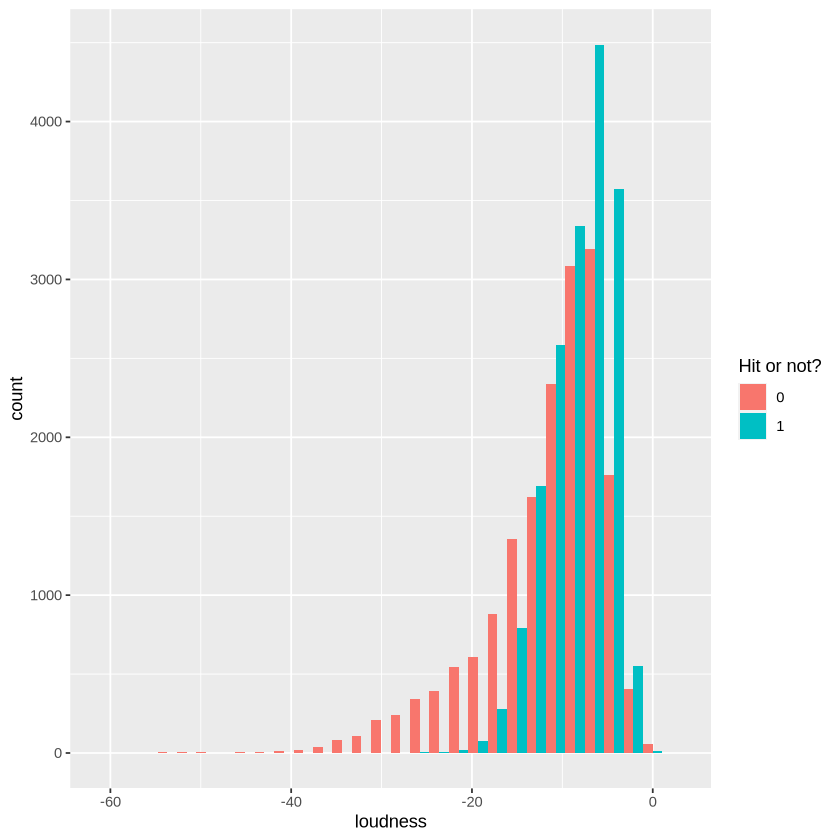

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


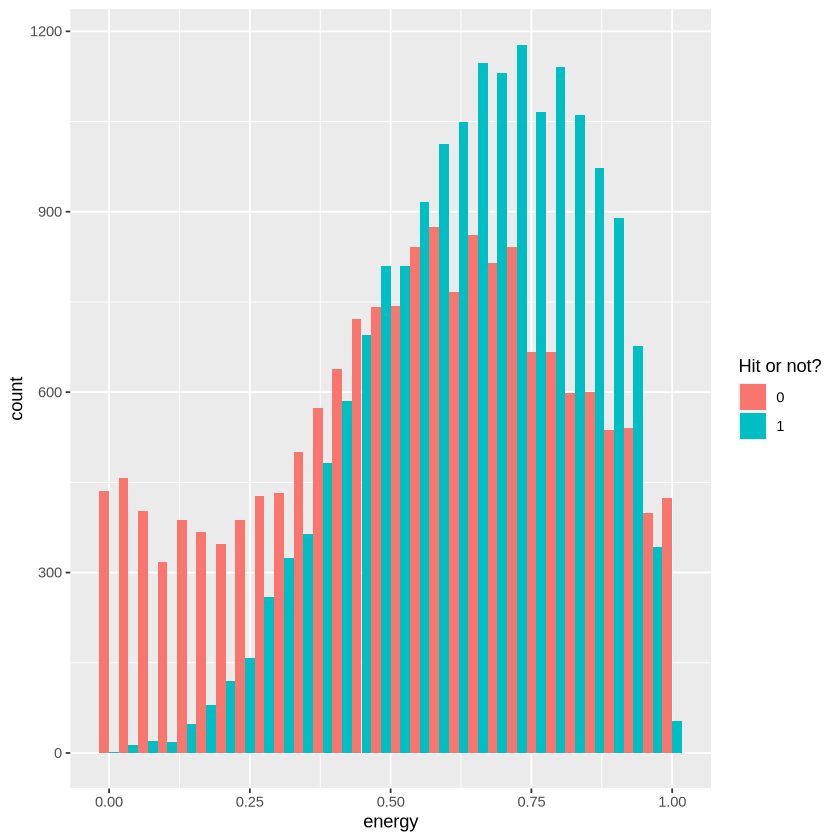

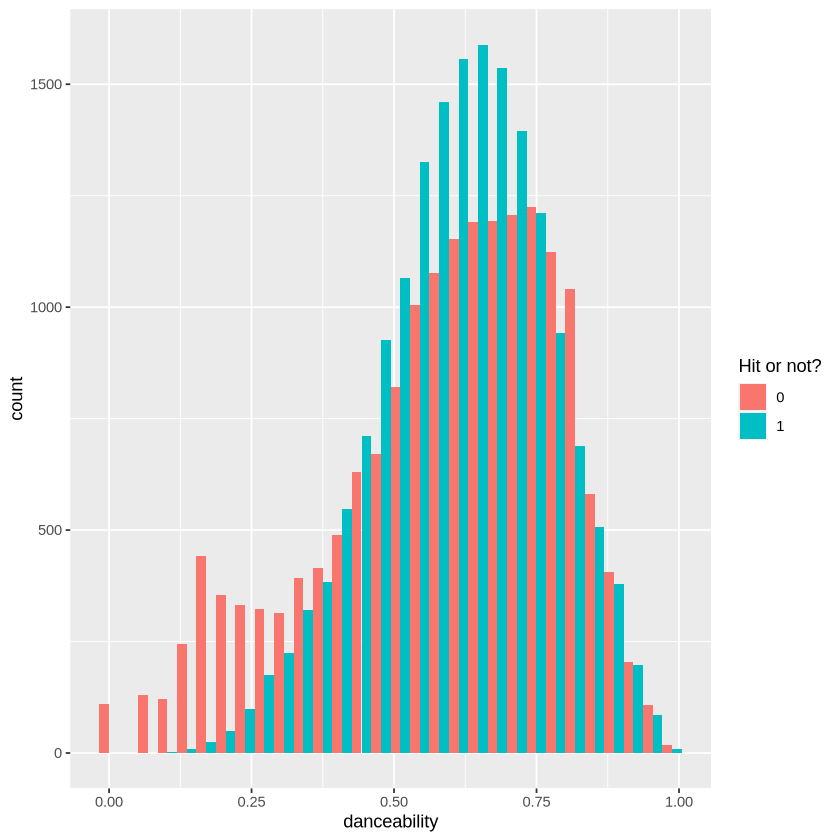

In [23]:
dist_plot_dance <- ggplot(spotify, aes(x = danceability, fill=as_factor(On_chart))) +
                    geom_histogram(position="dodge") +
                    labs(fill = "Hit or not?")
dist_plot_loudness <- ggplot(spotify, aes(x = loudness, fill=as_factor(On_chart))) +
                    geom_histogram(position="dodge") +
                    labs(fill = "Hit or not?")
dist_plot_energy <- ggplot(spotify, aes(x = energy, fill=as_factor(On_chart))) +
                    geom_histogram(position="dodge") +
                    labs(fill = "Hit or not?")


dist_plot_loudness
dist_plot_energy
dist_plot_dance

In [32]:
# mean values for all the specs of a hit song
 spotify_longer <- spotify |>
    mutate(duration_ms = duration_ms / 10000) |>
    pivot_longer(cols = duration_ms:On_chart,
                 names_to = "properties",
                 values_to = "value") |>
    group_by(properties) |>
    summarize(mean_value = mode(value)) 
spotify_longer 

properties,mean_value
<chr>,<chr>
On_chart,numeric
acousticness,numeric
danceability,numeric
duration_ms,numeric
energy,numeric
instrumentalness,numeric
liveness,numeric
loudness,numeric
speechiness,numeric
